# CSC 362 AI - ASSIGNMENT 2
## Author: Michael Wood

Water Jug Puzzle/Solution:

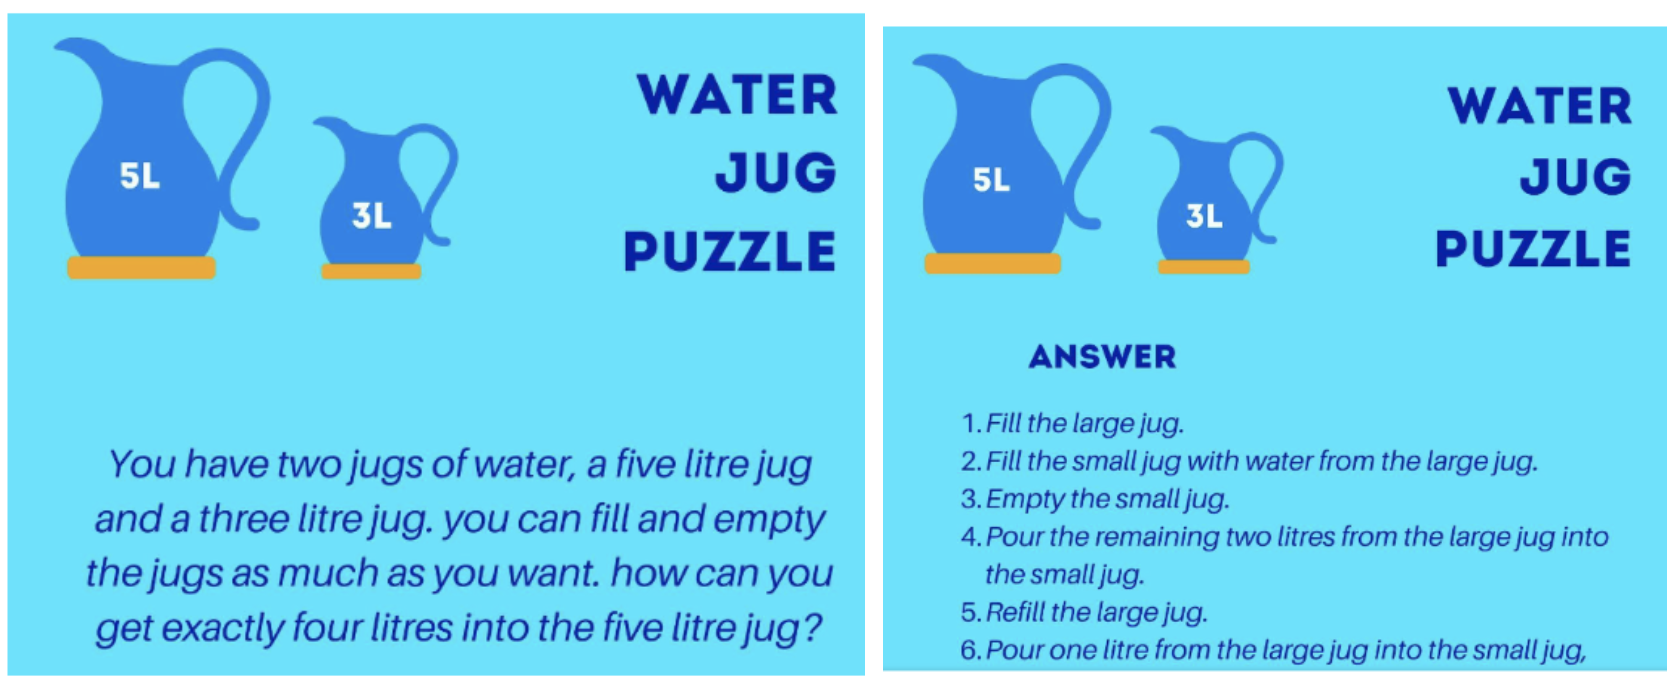

# **Start State:**
  
* [**Left**: Content of Large Jug,   **Right**: Content of Small Jug]
* (0,    0)
* Nothing in each jug

# **Goal State:**
  
* [**Left**: Content of Large Jug,   **Right**: Content of Small Jug]
* (4,    d)
  * 4 liters in large jug
  * d = does not matter what is in the small jug

# **Rules:**

1. We can fill the large jug completely without overfilling
2. We can fill the small jug completely without overfilling
3. We can empty the large jug completely
4. We can empty the small jug completely
5. We can pour everything we can from the large jug into the small jug
6. We can pour everything we can from the small jug into the large jug



# **Main Class:**

In [51]:

class WaterJugPuzzle():

    ####################################################################
    # Initial State
    ####################################################################

    # We model the state integers for each jug, start both at 0
    def __init__(self):
      self.large_jug = 0 # Initial content of large jug
      self.small_jug = 0 # Initial content of small jug

    ####################################################################
    # Guarding Against Illegal States
    ####################################################################

    # Overfilling jugs (greater than jug capacity)
    def is_large_jug_overfilled(self):
      return (self.large_jug > 5)

    def is_small_jug_overfilled(self):
      return (self.small_jug > 3)

    # Negative values
    def is_large_jug_negative(self):
      return (self.large_jug < 0)

    def is_small_jug_negative(self):
      return (self.small_jug < 0)

    # Check for legal state
    def state_ok(self):
      return not (self.is_large_jug_overfilled()
                  or self.is_small_jug_overfilled()
                  or self.is_large_jug_negative()
                  or self.is_small_jug_negative())

    ####################################################################
    # Save or Undo State
    ####################################################################
    def save_state(self):
      self._large_jug  = self.large_jug
      self._small_jug = self.small_jug

    def undo_state(self):
      self.large_jug  = self._large_jug
      self.small_jug = self._small_jug

    ####################################################################
    # Rule 1: We can fill large jug completely
    ####################################################################
    def R1_fill_large_jug(self):

      self.save_state()

      self.large_jug += 5

      # Check for overfilling
      if not (self.state_ok()):
        self.undo_state()

    ####################################################################
    # Rule 2: We can fill small jug completely
    ####################################################################
    def R2_fill_small_jug(self):

      self.save_state()

      self.small_jug += 3

      # Check for overfilling
      if not (self.state_ok()):
        self.undo_state()

    ####################################################################
    # Rule 3: We can empty(dump) large jug completely
    ####################################################################
    def R3_dump_large_jug(self):

      self.save_state()

      self.large_jug -= self.large_jug

      # Check for negative values
      if not (self.state_ok()):
        self.undo_state()

    ####################################################################
    # Rule 4: We can empty(dump) small jug completely
    ####################################################################
    def R4_dump_small_jug(self):

      self.save_state()

      self.small_jug -= self.small_jug

      # Check for negative values
      if not (self.state_ok()):
        self.undo_state()

    ####################################################################
    # Rule 5: We can pour large jug into small jug
    ####################################################################

    def R5_pour_large_to_small(self):

      self.save_state()

      # Find remaining space in small jug
      remaining_space = 3 - self.small_jug

      # Perform proper calculation for both jugs
      if (self.large_jug <= remaining_space):
        self.small_jug += self.large_jug
        self.large_jug = 0
      else:
        self.large_jug -= remaining_space
        self.small_jug = 3

      # Check for negative values or overfilling
      if not (self.state_ok()):
        self.undo_state()

    ####################################################################
    # Rule 6: We can pour small jug into large jug
    ####################################################################
    def R6_pour_small_to_large(self):

      self.save_state()

      # Find remaining space in large jug
      remaining_space = 5 - self.large_jug

      # Perform proper calculation for both jugs
      if (self.small_jug <= remaining_space):
        self.large_jug += self.small_jug
        self.small_jug = 0
      else:
        self.small_jug -= remaining_space
        self.large_jug = 5

      # Check for negative values or overfilling
      if not (self.state_ok()):
        self.undo_state()

    ####################################################################
    # Display contents of jugs
    ####################################################################
    def print_state(self):
        print("===> Large Jug: {s} liters, Small Jug: {h} liters".format(
            s=self.large_jug, h=self.small_jug))



# **Forming the Solution**

In [52]:
mcf = WaterJugPuzzle()

# We print the initial state
mcf.print_state()


# We apply a rule and print the resulting state
print("-----------------------")
mcf.R1_fill_large_jug()
mcf.print_state()

print("-----------------------")
mcf.R5_pour_large_to_small()
mcf.print_state()

print("-----------------------")
mcf.R4_dump_small_jug()
mcf.print_state()

print("-----------------------")
mcf.R5_pour_large_to_small()
mcf.print_state()

print("-----------------------")
mcf.R1_fill_large_jug()
mcf.print_state()

print("-----------------------")
mcf.R5_pour_large_to_small()
mcf.print_state()


===> Large Jug: 0 liters, Small Jug: 0 liters
-----------------------
===> Large Jug: 5 liters, Small Jug: 0 liters
-----------------------
===> Large Jug: 2 liters, Small Jug: 3 liters
-----------------------
===> Large Jug: 2 liters, Small Jug: 0 liters
-----------------------
===> Large Jug: 0 liters, Small Jug: 2 liters
-----------------------
===> Large Jug: 5 liters, Small Jug: 2 liters
-----------------------
===> Large Jug: 4 liters, Small Jug: 3 liters
